<img src="lin_reg_thumb.jpg" width=70%>

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

# Generate Data

In [3]:
#create noisy data
x = np.arange(-2,10.2,0.2)
y = 5*x + 3

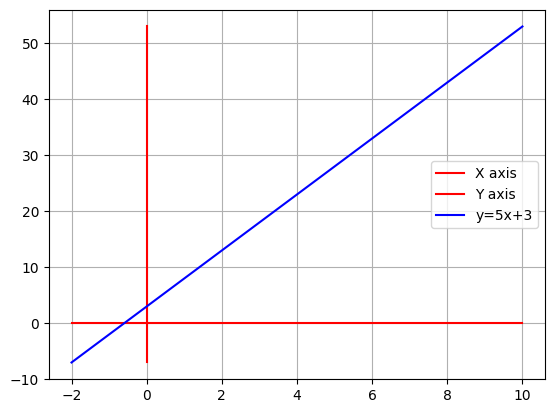

In [4]:
plt.plot([x.min(),x.max()],[0,0],color='red')
plt.plot([0,0],[y.min(),y.max()],color='red')
plt.plot(x,y,color='blue')
plt.grid('on')
plt.legend(['X axis','Y axis','y=5x+3'])

In [5]:
noise = np.random.uniform(-5,5,x.shape[0])

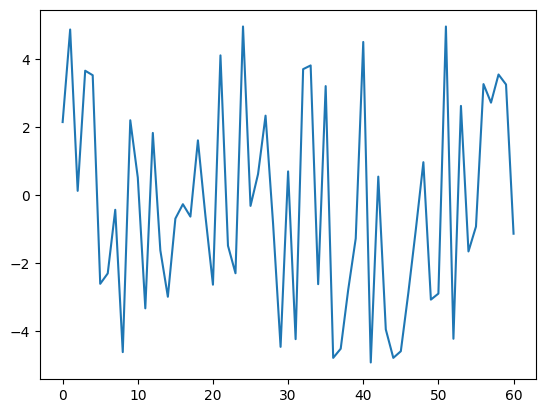

In [6]:
plt.plot(noise)

Text(0, 0.5, 'Y axis')

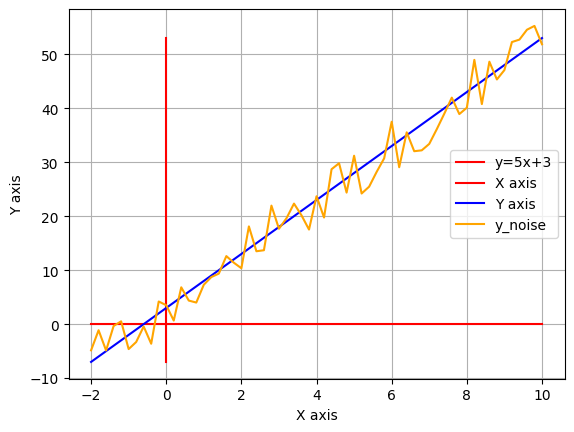

In [7]:
y_noise = y+noise
plt.plot([x.min(),x.max()],[0,0],color='red')
plt.plot([0,0],[y.min(),y.max()],color='red')
plt.plot(x,y,color='blue')
plt.plot(x,y+noise,color='orange')
plt.grid('on')

plt.legend(['y=5x+3','X axis','Y axis','y_noise'])
plt.xlabel('X axis')
plt.ylabel('Y axis')

Text(0, 0.5, 'Y axis')

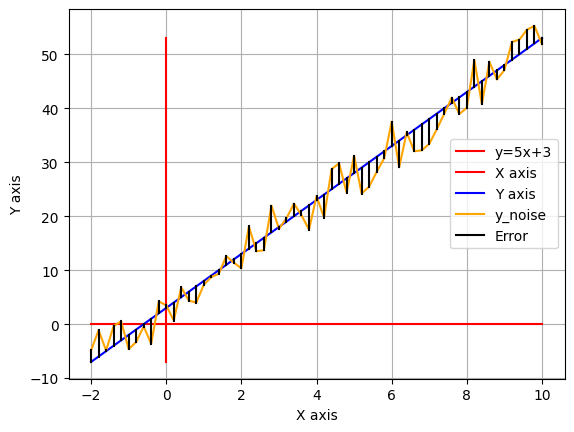

In [8]:
y_noise = y+noise
plt.plot([x.min(),x.max()],[0,0],color='red')
plt.plot([0,0],[y.min(),y.max()],color='red')
plt.plot(x,y,color='blue')
plt.plot(x,y+noise,color='orange')
plt.grid('on')

MSE = 0
for ind in range(x.shape[0]):
    MSE += (y[ind] - y_noise[ind])*(y[ind] - y_noise[ind]) 
    #print(x[ind],y[ind],y_noise[ind])
    plt.plot([x[ind],x[ind]],[y[ind],y_noise[ind]],color='black')
plt.legend(['y=5x+3','X axis','Y axis','y_noise','Error'])
plt.xlabel('X axis')
plt.ylabel('Y axis')

# Mean Square Error (MSE) Cost Function: Measure of Approximation Quality

$$
  MSE = J(\omega,b) = \frac{1}{N}\sum_{i=1}^N(y_i - (\omega*x_i+b))^2
$$


In [9]:
#Mean Scquare Error
error = y - y_noise
MSE = np.dot(error,error)/x.shape[0]
MSE

9.038873079475078

In [10]:
MSE /= x.shape[0]

In [11]:
MSE = 0
for ind in range(x.shape[0]):
    MSE += (y[ind] - y_noise[ind])*(y[ind] - y_noise[ind])
print(MSE/x.shape[0])

9.038873079475076


In [12]:
#Mean Scquare Error as a function of w and b
MSE_by_w = []
w_list = list(np.arange(0,10.2,0.2))
for w in w_list:
    error = (w*x+3) - y_noise
    MSE_by_w.append(np.dot(error,error)/x.shape[0])

Text(0, 0.5, 'MSE(w,b=3)')

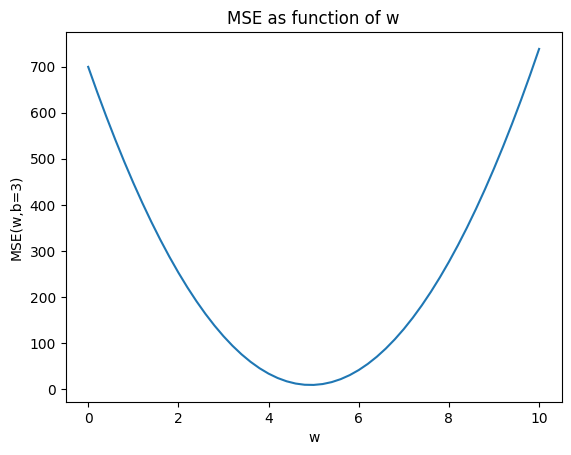

In [13]:
plt.plot(w_list,MSE_by_w)
plt.title('MSE as function of w')
plt.xlabel('w')
plt.ylabel('MSE(w,b=3)')

In [14]:
#Mean Scquare Error as a function of w and b
MSE_by_b = []
b_list = list(np.arange(0,10.2,0.2))
for b in b_list:
    error = (5*x+b) - y_noise
    MSE_by_b.append(np.dot(error,error)/x.shape[0])

Text(0, 0.5, 'MSE(w=5,b)')

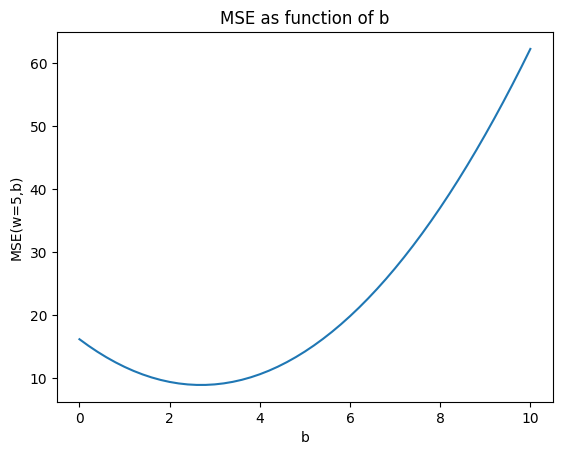

In [15]:
plt.plot(b_list,MSE_by_b)
plt.title('MSE as function of b')
plt.xlabel('b')
plt.ylabel('MSE(w=5,b)')

In [16]:
W = np.arange(0,10.2,0.2)
w_list = list(W)
B = np.arange(0,10.2,0.2)
b_list = list(B)
W_grid, B_grid = np.meshgrid(W, B)

In [17]:
J = np.zeros((W.shape[0],B.shape[0]))
for i,w in enumerate(w_list):
    for j,b in enumerate(b_list):
        error = (w*x+b) - y_noise
        MSE = np.dot(error,error)/x.shape[0]
        J[j,i] = MSE
        #print(i,j,w,b,MSE)

In [18]:
J.shape

(51, 51)

In [19]:
W.shape

(51,)

In [20]:
W_grid.shape

(51, 51)

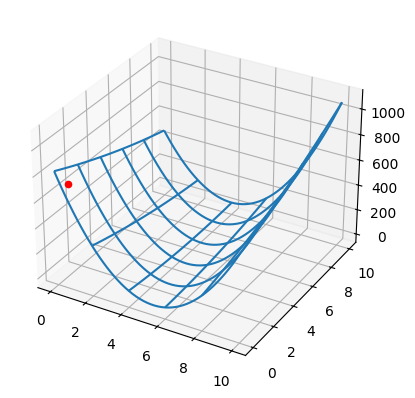

In [21]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(W_grid, B_grid, J, 
                         rstride=10, 
                         cstride=10)
ax.scatter(w_list[3],b_list[1],J[3,1], marker='o',color="red")

# Run Gradient Descent

$$
  MSE = J(\omega,b) = \frac{1}{N}\sum_{i=1}^N(y_i - (\omega*x+b))^2
$$

$$
  \frac{\partial J(\omega,b)}{\partial w} = \frac{1}{N}\sum_{i=1}^N2*x_i*error_i
$$
$$
  \frac{\partial J(\omega,b)}{\partial b} = \frac{1}{N}\sum_{i=1}^N2*error_i
$$
$$
  error_i = y\_pred_i - y_i
$$


In [22]:
w = np.random.uniform(-0.5,0.5)
b = np.random.uniform(0,3)

w_in_time = [w]
b_in_time = [b]
dw_in_time = []
db_in_time = []
mse_in_time = []

for item in range(100):
    #Step 1: computed cost and gradients
    y_pred = w*x + b
    error = y_pred - y_noise
    dw = np.dot(x.T,error)/x.shape[0]
    db = np.sum(error)/x.shape[0]
    mse = np.dot(error,error)/x.shape[0]
    #dw,db, mse
    dw_in_time.append(dw)
    db_in_time.append(db)
    mse_in_time.append(mse)
    
    #Step 2: updated params
    lr = 0.01
    w = w - lr*dw
    b = b - 0.08*db
    w_in_time.append(w)
    b_in_time.append(b)

In [23]:
w,b

(4.9039907118508355, 3.1672076976344252)

# Convergence of the paramters and the loss

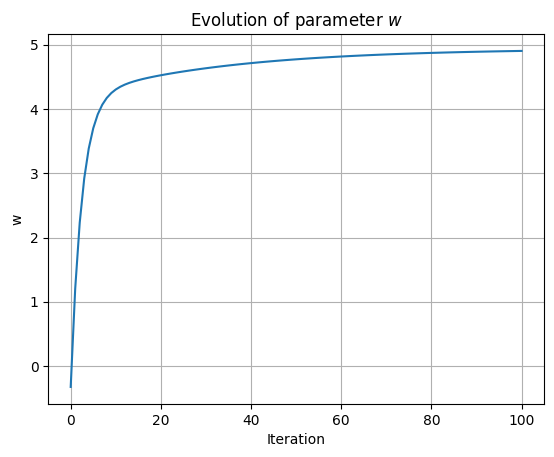

In [24]:
plt.plot(w_in_time)
plt.title('Evolution of parameter $w$')
plt.xlabel('Iteration')
plt.ylabel('w')
plt.grid('on')

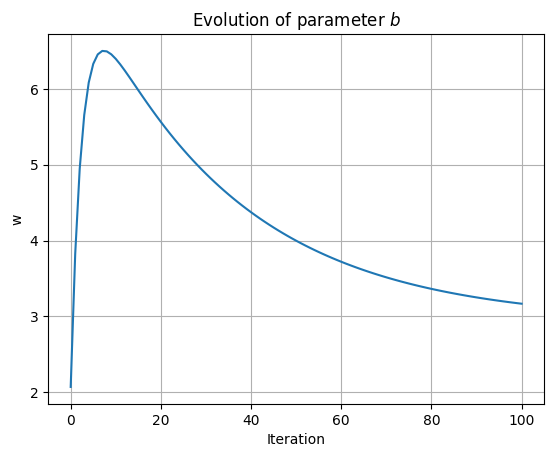

In [25]:
plt.plot(b_in_time)
plt.title('Evolution of parameter $b$')
plt.xlabel('Iteration')
plt.ylabel('w')
plt.grid('on')

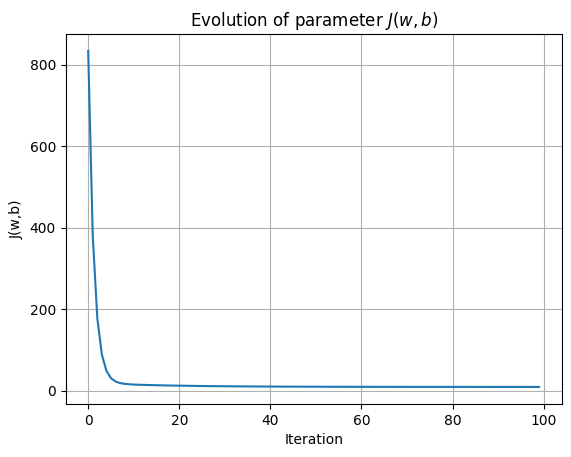

In [26]:
plt.plot(mse_in_time)
plt.title('Evolution of parameter $J(w,b)$')
plt.xlabel('Iteration')
plt.ylabel('J(w,b)')
plt.grid('on')

# Visualize Gradient Descent

<Figure size 500x500 with 0 Axes>

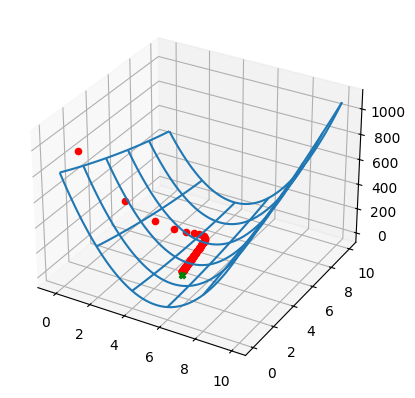

In [27]:
plt.figure(figsize=(5,5))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_wireframe(W_grid, B_grid, J, 
                         rstride=10, 
                         cstride=10)

ax.scatter(5,3,0, marker='X',color="green")
for w_val, b_val, mse_val in zip(w_in_time[:-1],b_in_time[:-1],mse_in_time):
    ax.scatter(w_val,b_val,mse_val, marker='o',color="red")

In [28]:
import numpy as np
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)

Text(0.5, 0, 'J(w,b)')

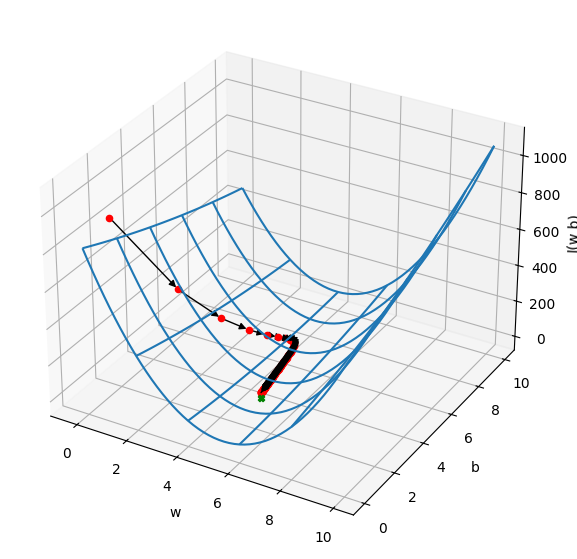

In [29]:
#plt.rcParams['figure.figsize'] = [10, 10]
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(W_grid, B_grid, J, 
                         rstride=10, 
                         cstride=10)
cut_off = 100
w_in_time = np.array(w_in_time[:cut_off])
b_in_time = np.array(b_in_time[:cut_off])
mse_in_time = np.array(mse_in_time[:cut_off])

cutoff = 99
for w_val, b_val, mse_val in zip(w_in_time[:cutoff],b_in_time[:cutoff],mse_in_time[:cutoff]):
    ax.scatter(w_val,b_val,mse_val, marker='o',color="red")

ax.scatter(5,3,0, marker='X',color="green")

for ind in range(cutoff):
    a = Arrow3D([w_in_time[ind], w_in_time[ind+1]], [b_in_time[ind], b_in_time[ind+1]], 
                [mse_in_time[ind], mse_in_time[ind+1]], mutation_scale=10, 
                lw=1, arrowstyle="-|>", color="black")
    ax.add_artist(a)    

ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('J(w,b)')

# Compare Original line and Approximated Version

Text(0, 0.5, 'Y axis')

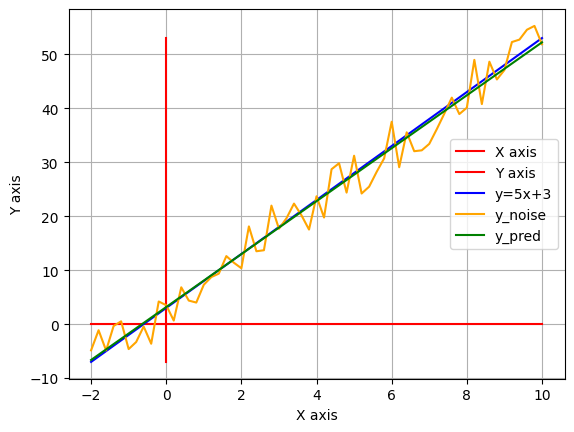

In [30]:
y_noise = y+noise
plt.plot([x.min(),x.max()],[0,0],color='red')
plt.plot([0,0],[y.min(),y.max()],color='red')
plt.plot(x,y,color='blue')
plt.plot(x,y+noise,color='orange')
plt.plot(x,w*x+b,color='green')
plt.grid('on')
plt.legend(['X axis','Y axis','y=5x+3','y_noise','y_pred'])
plt.xlabel('X axis')
plt.ylabel('Y axis')